In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline ()
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams

rcParams['figure.figsize'] = (9, 6)

UsageError: unrecognized arguments: ()


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# читаем данные

data = pd.read_csv('C:/Netology/Machine_Learning/Lecture_9/train.csv', na_values='?', encoding='UTF-8')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
list_columns = list(data.columns)

list_columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# процент пропусков в столбцах, где есть пропуски

print('===========================================================')
print('Пропуски в данных:')
for column, item in zip(list_columns, (data.isna().mean() * 100).round(2)):
    if item != 0:
        print(f'Название столбца: {column}, наличие пропусков {item} %')
print('===========================================================')

Пропуски в данных:
Название столбца: LotFrontage, наличие пропусков 17.74 %
Название столбца: Alley, наличие пропусков 93.77 %
Название столбца: MasVnrType, наличие пропусков 0.55 %
Название столбца: MasVnrArea, наличие пропусков 0.55 %
Название столбца: BsmtQual, наличие пропусков 2.53 %
Название столбца: BsmtCond, наличие пропусков 2.53 %
Название столбца: BsmtExposure, наличие пропусков 2.6 %
Название столбца: BsmtFinType1, наличие пропусков 2.53 %
Название столбца: BsmtFinType2, наличие пропусков 2.6 %
Название столбца: Electrical, наличие пропусков 0.07 %
Название столбца: FireplaceQu, наличие пропусков 47.26 %
Название столбца: GarageType, наличие пропусков 5.55 %
Название столбца: GarageYrBlt, наличие пропусков 5.55 %
Название столбца: GarageFinish, наличие пропусков 5.55 %
Название столбца: GarageQual, наличие пропусков 5.55 %
Название столбца: GarageCond, наличие пропусков 5.55 %
Название столбца: PoolQC, наличие пропусков 99.52 %
Название столбца: Fence, наличие пропусков 80.

In [9]:
# количество пропусков в столбцах, где есть пропуски

data.isnull().sum()[data.isnull().sum().values != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
#Находим категориальные признаки

cat_feat = list(data.dtypes[data.dtypes == object].index)

cat_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
# Разбиваем данные на категориальные и числовые

data_cat = data[cat_feat]

data_int = data.drop(cat_feat, axis=1)

In [12]:
# заполняем пропуски

data[data_cat.columns] = data_cat[data_cat.columns].fillna('NaN')
data[data_int.columns] = data[data_int.columns].fillna(0)

In [13]:
# проверяем

data.isnull().sum()[data.isnull().sum().values != 0]

Series([], dtype: int64)

In [14]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
# Обрабатываем категориальные переменные (при предположении что в test будут отличные значения,
# следовало бы обучаться только на train)
# Так же для каждого признака нужно было бы создать LabelEncoder, но в нашем примере можно этого не делать

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

for i  in data_cat.columns:
    if len(data[i].unique()) < 8:
        data = pd.get_dummies(data, columns=[i])
    else:
        le.fit(data[i])
        data[i] = le.transform(data[i])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 216 entries, Id to SaleCondition_Partial
dtypes: float64(3), int32(8), int64(35), uint8(170)
memory usage: 721.6 KB


In [18]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,MiscFeature_NaN,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,5,2,2,5,7,5,...,1,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,24,1,2,2,6,8,...,1,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,5,2,2,5,7,5,...,1,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,6,2,2,5,7,5,...,1,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,15,2,2,5,8,5,...,1,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data.loc[:, data.columns != 'SalePrice'], data['SalePrice'], test_size=0.3) 

In [20]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1022, 215), (1022,), (438, 215), (438,))

In [21]:
# делаем нормирование

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_sc = std.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_valid_sc = std.transform(X_valid)
X_valid = pd.DataFrame(X_valid_sc, columns=X_train.columns)

Проверим как предсказывает модель на случайном лесе

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [23]:
clf_rf = RandomForestRegressor(n_jobs=-1, n_estimators=200)
max_depth = [5, 9, 13, 15]
min_samples_split = [10, 15, 25]
param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

clf_rf = GridSearchCV(clf_rf, param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 9, 13, 15],
                         'min_samples_split': [10, 15, 25]},
             scoring='neg_mean_squared_error')

In [24]:
clf_rf_best = clf_rf.best_estimator_

In [25]:
y_pred_rf = clf_rf_best.predict(X_valid)

In [26]:
# Оценка по RandomForestRegressor

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_valid, y_pred_rf)
lin_rmse_rf = np.sqrt(lin_mse)
lin_rmse_rf

23736.136240572447

In [27]:
# Выводим важность признаков (TOP-5) 

imp = pd.Series(clf_rf_best.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False).head()

OverallQual    0.587493
GrLivArea      0.093678
2ndFlrSF       0.039818
TotalBsmtSF    0.035604
BsmtFinSF1     0.031414
dtype: float64

Реализуем стекинг

In [28]:
from sklearn.model_selection import StratifiedKFold

In [29]:
cv = StratifiedKFold(n_splits=10)

In [30]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float) 
    meta_test = np.zeros(X_test.shape[0], dtype=float) 
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)): 
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

Первая модель для стекинга

In [31]:
from sklearn.linear_model import Lasso

lin_reg = Lasso()

In [32]:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.]}

lasso_grid = GridSearchCV(lin_reg, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [33]:
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

In [34]:
lasso_grit_best = lasso_grid.best_estimator_

In [35]:
y_pred_lasso = lasso_grit_best.predict(X_valid)

In [36]:
lin_mse = mean_squared_error(y_valid, y_pred_lasso)
rmse_lasso = np.sqrt(lin_mse)
rmse_lasso

62866.2238543414

Вторая модель для стекинга RandomForest которую реализовали ранее

In [37]:
clf_rf_best = clf_rf.best_estimator_

In [38]:
y_pred_rf = clf_rf_best.predict(X_valid)

In [39]:
lin_mse = mean_squared_error(y_valid, y_pred_rf)
rmse_rf = np.sqrt(lin_mse)
rmse_rf

23736.136240572447

Третья модель для стекинга

In [40]:
from sklearn.svm import SVR

In [41]:
svr_lin = SVR(kernel="linear", C=100, gamma="auto")

In [42]:
svr_lin.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [43]:
print("The model training score is" , svr_lin.score(X_train, y_train))

The model training score is 0.8280276192990902


In [44]:
y_pred_svr_lin = svr_lin.predict(X_valid)

In [45]:
svr_lin_mse = mean_squared_error(y_valid, y_pred_svr_lin)
rmse_svr = np.sqrt(svr_lin_mse)
rmse_svr

25990.97827456542

Четвертая модель

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor(max_depth = 7, random_state=42)

In [48]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [49]:
print("The model training score is" , tree_reg.score(X_train, y_train))

The model training score is 0.946333696939552


In [50]:
y_pred_tree = tree_reg.predict(X_valid)

In [51]:
tree_mse = mean_squared_error(y_valid, y_pred_tree)
rmse_tree = np.sqrt(tree_mse)
rmse_tree

35577.98371401513

На этих трех моделях реализуем стекинг

In [52]:
all_models = [lasso_grit_best, clf_rf_best, svr_lin, tree_reg]

In [53]:
meta_train = []
meta_test = []
for i in all_models:
    meta_tr, meta_te = get_meta_features(i, X_train, y_train, X_valid, cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)

    
col_names = ['lasso_model', 'rf_model', 'svr_lin_reg', 'tree_reg']

In [54]:
X_train_meta = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_test_meta = pd.DataFrame(np.stack(meta_test,axis=1), columns=col_names)

In [55]:
X_train_meta.head(3)

,lasso_model,rf_model,svr_lin_reg,tree_reg
0,153214.956827,134939.488139,157093.492075,143536.956522
1,155627.194331,126333.865869,123275.505223,133428.571429
2,295179.001992,248057.801686,284625.672398,257007.545455


### Обучаем гипер модель (LinearRegression)

In [56]:
from sklearn.linear_model import LinearRegression
clf_lr_meta = LinearRegression(n_jobs=-1)

In [57]:
clf_lr_meta.fit(X_train_meta, y_train)

LinearRegression(n_jobs=-1)

In [58]:
yl_pred_meta_test = clf_lr_meta.predict(X_test_meta)

In [59]:
lin_mse = mean_squared_error(y_valid, yl_pred_meta_test)
rmse_stack = np.sqrt(lin_mse)
rmse_stack

21614.426054775293

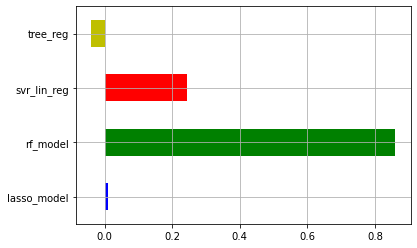

In [60]:
colors = ['b', 'g', 'r', 'y']

pd.Series(clf_lr_meta.coef_.flatten(), index=X_train_meta.columns).plot(kind='barh', color = colors).grid()

In [62]:
print ('Результат Lasso Regression', rmse_lasso)
print ('Результат Lasso RandomForest', rmse_rf)
print ('Результат SVR', rmse_svr)
print ('Результат DecisionTreeRegressor', rmse_tree)
print ('Результат stacking', rmse_stack)

Результат Lasso Regression 62866.2238543414
Результат Lasso RandomForest 23736.136240572447
Результат SVR 25990.97827456542
Результат DecisionTreeRegressor 35577.98371401513
Результат stacking 21614.426054775293
